In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
sns.set()

In [2]:
#loading the file 
std = pd.read_csv(r"F:\IMARTICUS\LOGISTIC REGRESSION\xAPI-Edu-Data.csv")

In [3]:
std.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
std.shape

(480, 17)

In [5]:
std.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


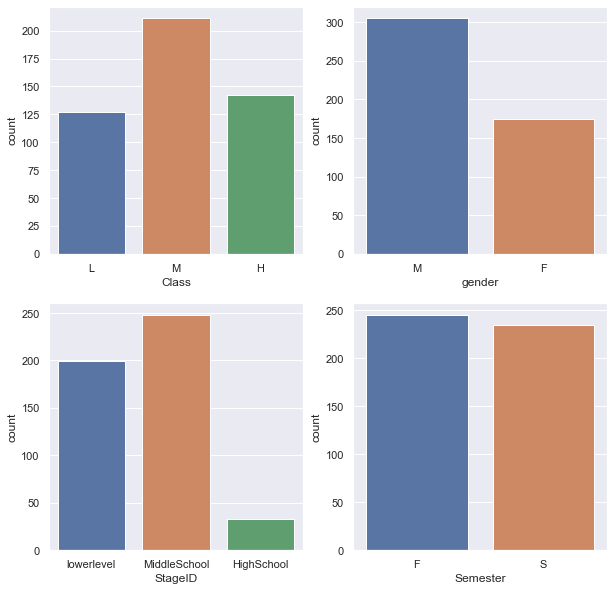

In [9]:
#1. question
fig, axarr = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class',data=std,ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender',data=std,ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID',data=std,ax=axarr[1,0])
sns.countplot(x='Semester',data=std,ax=axarr[1,1])

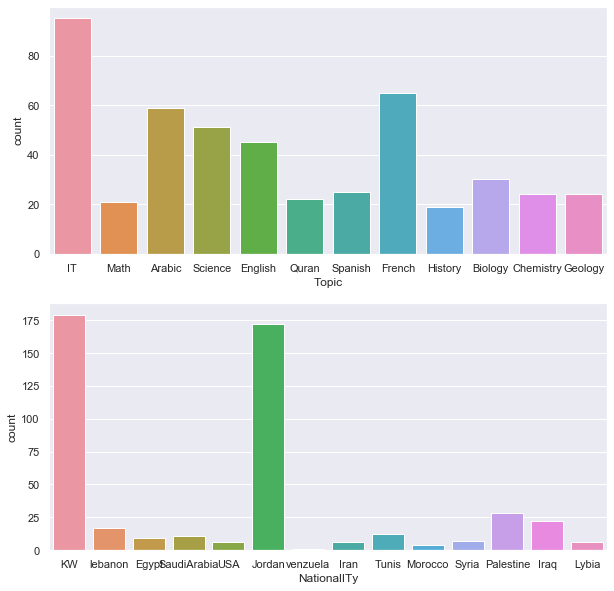

In [13]:
fig , (axis1, axis2) = plt.subplots(2,1 , figsize=(10,10))
sns.countplot(x='Topic', data=std, ax=axis1)
sns.countplot(x='NationalITy', data=std, ax=axis2)

middle east countries, explains geneder disparity


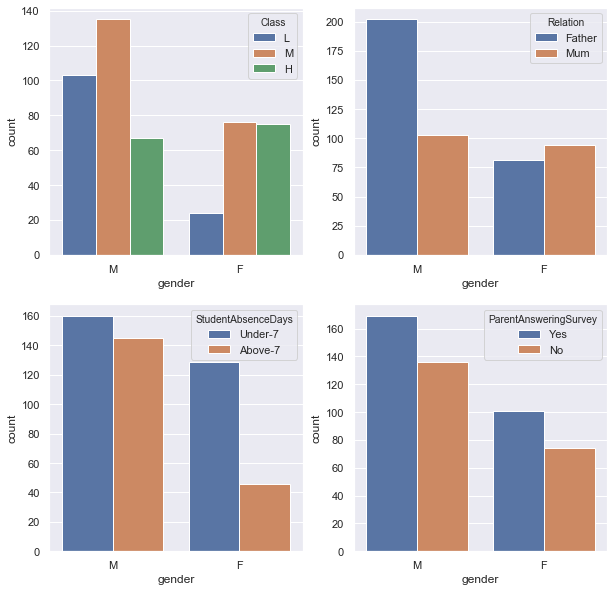

In [14]:
#2.question
fig, axarr = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender',hue='Class',data=std,ax=axarr[0,0],order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender',hue='Relation', data=std,ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender',hue='StudentAbsenceDays',data=std,ax=axarr[1,0],order=['M','F'])
sns.countplot(x='gender',hue='ParentAnsweringSurvey',data=std,ax=axarr[1,1],order=['M','F'])

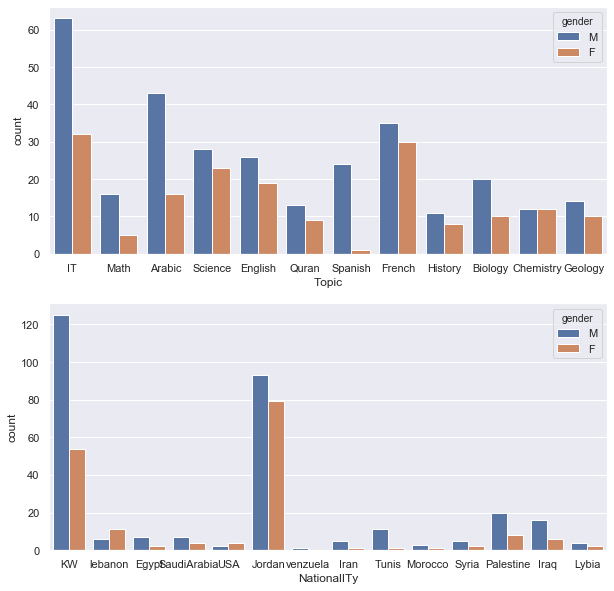

In [16]:
fig , (axis1, axis2) = plt.subplots(2,1 , figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=std, ax=axis1)
sns.countplot(x='NationalITy',hue='gender' ,data=std, ax=axis2)

ans:

girls seem to have performed better than boys 
in case of girls, mothers seem to be more intrested in their education then fathers.
Girls had much better attendance than boys
No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
Gender disparity holds even at a country level. May just be as a result of the sampling


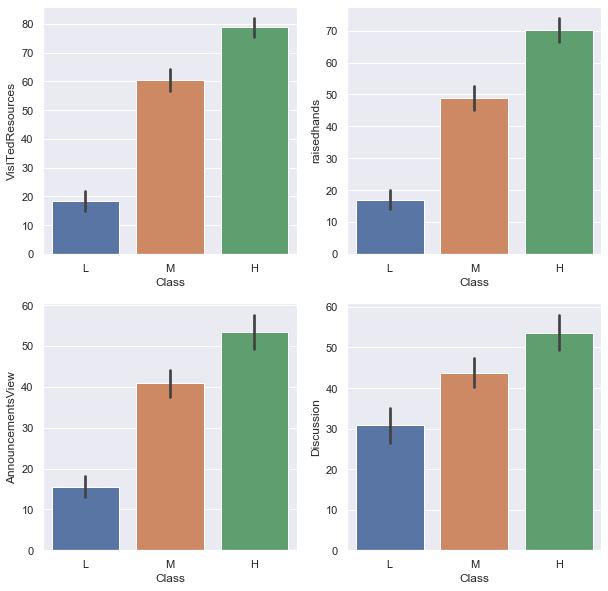

In [20]:
#3. question
fig, axarr = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class',y='VisITedResources', data=std, order=['L','M','H'],ax=axarr[0,0])
sns.barplot(x='Class',y='raisedhands', data=std, order=['L','M','H'],ax=axarr[0,1])
sns.barplot(x='Class',y='AnnouncementsView', data=std,order=['L','M','H'],ax=axarr[1,0])
sns.barplot(x='Class',y='Discussion', data=std,order=['L','M','H'],ax=axarr[1,1])

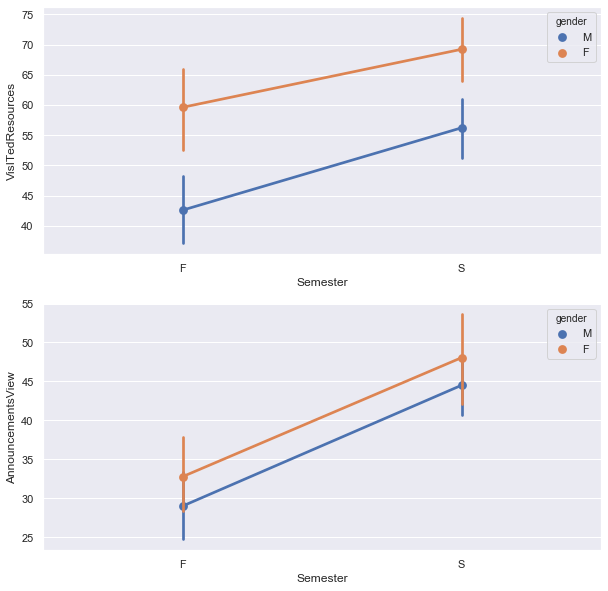

In [21]:
fig , (axis1, axis2) = plt.subplots(2,1 , figsize=(10,10))
sns.pointplot(x='Semester',y='VisITedResources', hue='gender', data=std, ax=axis1)
sns.pointplot(x='Semester',y='AnnouncementsView',hue='gender' ,data=std, ax=axis2)

ans:
. as expected those that participated more(higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better.
. in case of both visiting resources and viewing announcemnets, students were more vigilant in the second semester perhaps that last min need to boost your final grade.

In [23]:
#4.question
ave_raisedhands = sum(std['raisedhands'])/len(std['raisedhands'])
ave_VisITedResources = sum(std['VisITedResources'])/len(std['VisITedResources'])
ave_AnnouncementsView = sum(std['AnnouncementsView'])/len(std['AnnouncementsView'])
unsuccess = std.loc[(std['raisedhands'] >= ave_raisedhands) & (std['VisITedResources'] >= ave_VisITedResources) & (std['AnnouncementsView'] >= ave_AnnouncementsView) & (std['Class']=='L')]

In [24]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [25]:
std['numeric_class'] = [1 if std.loc[i,'Class'] =='L' else 2 if std.loc[i,'Class']=='M' else 3 for i in range(len(std))]

In [26]:
grade_male_ave = sum(std[std.gender == 'M'].numeric_class)/float(len(std[std.gender == 'M']))
grade_female_ave = sum(std[std.gender == 'F'].numeric_class)/float(len(std[std.gender == 'F']))

gender comparison cannot completely explain low level grades

jordan average:2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

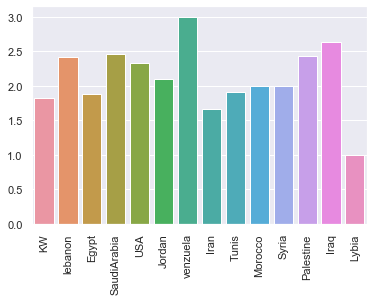

In [31]:
#now lets look at nationality
nation = std.NationalITy.unique()
nation_grade_aves=[sum(std[std.NationalITy == i].numeric_class)/float(len(std[std.NationalITy == i])) for i in nation]
ax= sns.barplot(x=nation,y=nation_grade_aves)
jordan_ave= sum(std[std.NationalITy =='Jordan'].numeric_class)/float(len(std[std.NationalITy == 'Jordan']))
print('jordan average:' +str(jordan_ave))
plt.xticks(rotation=90)

. as it can be seen in bar plot jordan is seventh country  with avg 2.09 'jordan' has +ve impact on these two students acctully

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

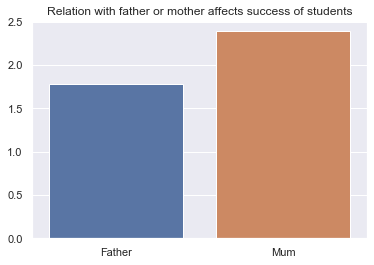

In [32]:
#lets look at relation with family members
rela = std.Relation.unique()
rela_grade_ave = [sum(std[std.Relation == i].numeric_class)/float(len(std[std.Relation == i])) for i in rela]
ax= sns.barplot(x=rela,y=rela_grade_ave)
plt.title('Relation with father or mother affects success of students')


having relationship with mum has +ve efect on students

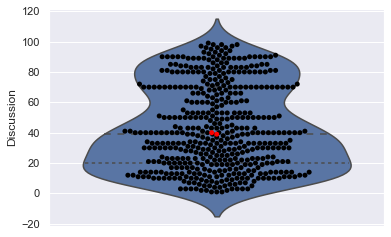

In [34]:
#let look at how many times students participate on discussion gropus
discuss = std.Discussion
discuss_ave = sum(discuss)/len(discuss)
ax = sns.violinplot(y=discuss, split=True, inner='quart')
ax = sns.swarmplot(y=discuss, color='black')
ax = sns.swarmplot(y=unsuccess.Discussion, color='red')
 #inner:{box, quartile, point, stick , none}, optinal : represents datapoints in the violin interior

Text(0.5, 1.0, 'Absence effect on success')

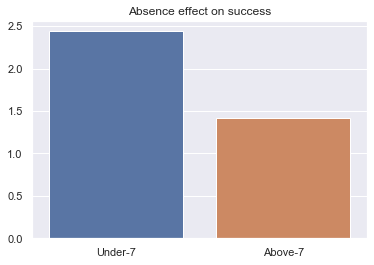

In [35]:
#now last;y look at 
abd = std.StudentAbsenceDays.unique()
ab_day_ave = [sum(std[std.StudentAbsenceDays == i].numeric_class)/float(len(std[std.StudentAbsenceDays == i])) for i in abd]
ax = sns.barplot(x=abd,y=ab_day_ave)
plt.title('Absence effect on success')

Ans :

These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades
Their absence days are above seven which resulted in low grades


# 5.Model building 

In [36]:
std.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [37]:
std1 = std.drop('Class',axis=1)
std_dummies = pd.get_dummies(std1, drop_first=True)

In [38]:
std_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [39]:
features = std_dummies.drop(['numeric_class'], axis =1)
target =std_dummies['numeric_class']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
x = scaler.fit_transform(features)

In [44]:
X_train, X_test , y_train, y_test = train_test_split(x, target , test_size=0.3, random_state=45)

In [45]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test , Prediction)
Report =classification_report(y_test, Prediction)

In [48]:
Prediction

array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2], dtype=int64)

In [49]:
Score

0.7361111111111112

In [50]:
print(Report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

